Тестовое задание на позицию “Аналитик данных”

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import math as mth

import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter
import plotly.express as px
from plotly import graph_objects as go

import matplotlib as mpl
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import datetime

from scipy import stats as st

In [3]:
# загружаем данные

df = pd.read_csv(r'C:\Users\Тай-Хоо\Downloads\train - train.csv')

In [4]:
df.sample(5)

,ID,Order Date,Class,Region,Sub-Category,Sales
850,3799,04/11/2018,Первый класс,Москва,Tables,"36192,81"
6841,4490,05/09/2016,Стандарт,Урал,Binders,"27270,81"
5046,1134,05/06/2017,Стандарт,Владивосток,Storage,"25798,82"
853,8912,04/11/2018,Стандарт,Москва,Phones,"5193,039"
3188,1885,19/01/2018,Второй класс,Урал,Labels,"21515,98"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


Названия столбцов не по стандарту, тип данных  Order Date не datatime

## Предобработка данных:

In [7]:
print('Количество полных дубликатов', df.duplicated().sum())
print('Доля полных дубликатов', df.duplicated().sum() / len(df))

Количество полных дубликатов 0
Доля полных дубликатов 0.0


Исправим названия столбцов по стандарту

In [8]:
df = df.rename(columns={'ID': 'id', 'Order Date': 'order_date', 
                            'Class': 'class', 'Region': 'region',
                        'Sub-Category':'sub_category', 'Sales':'sales'})

In [18]:
df.isna().sum()

id              0
order_date      0
class           0
region          0
sub_category    0
sales           0
dtype: int64

Изменим тип данных order_date на datatime

In [13]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [22]:
df.head(5)

,id,order_date,class,region,sub_category,sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13


In [20]:
# Заменим запятые на точки в столбце sales и преобразуем в float
df['sales'] = df['sales'].str.replace(',', '.').astype(float)

In [21]:
df.info()
df.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            9800 non-null   int64         
 1   order_date    9800 non-null   datetime64[ns]
 2   class         9800 non-null   object        
 3   region        9800 non-null   object        
 4   sub_category  9800 non-null   object        
 5   sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


,id,order_date,class,region,sub_category,sales
9019,9779,2015-07-26,Стандарт,Урал,Binders,11200.29


**Вывод:**
Мы отредактировали названия столбцов, изменили формат даты. А также формат в колонке sales. В данных нет дубликатов, можно начинать анализ данных

## Задание 1

     а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
     б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
     в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

 Подгруппа – sub_category
 
 Дата – order_date

In [25]:
df['order_date'].describe()

count                             9800
mean     2017-05-01 05:13:51.673469184
min                2015-01-03 00:00:00
25%                2016-05-24 00:00:00
50%                2017-06-26 00:00:00
75%                2018-05-15 00:00:00
max                2018-12-30 00:00:00
Name: order_date, dtype: object

In [26]:
# Установим временные рамки
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2018-12-31')

In [27]:
# а) Наиболее часто покупаемые подгруппы товаров за все время
all_time_counts = df['sub_category'].value_counts().head(4)
print("Наиболее часто покупаемые подгруппы товаров за все время:")
print(all_time_counts)

Наиболее часто покупаемые подгруппы товаров за все время:
sub_category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: count, dtype: int64


In [28]:
# б) Наиболее часто покупаемые подгруппы товаров за последние два года (2017 и 2018)
recent_two_years_counts = df[(df['order_date'] >= start_date) & (df['order_date'] <= end_date)]['sub_category'].value_counts().head(4)
print("\nНаиболее часто покупаемые подгруппы товаров за последние два года (2017-2018):")
print(recent_two_years_counts)


Наиболее часто покупаемые подгруппы товаров за последние два года (2017-2018):
sub_category
Binders        900
Paper          809
Furnishings    557
Phones         510
Name: count, dtype: int64


In [29]:
# в) Наиболее часто покупаемые подгруппы товаров за последний год (2018)
one_year_ago = pd.Timestamp('2018-01-01')
recent_one_year_counts = df[df['order_date'] >= one_year_ago]['sub_category'].value_counts().head(4)
print("\nНаиболее часто покупаемые подгруппы товаров за последний год (2018):")
print(recent_one_year_counts)


Наиболее часто покупаемые подгруппы товаров за последний год (2018):
sub_category
Binders        492
Paper          452
Furnishings    310
Phones         290
Name: count, dtype: int64


## Вывод: Подгруппы товаров, которые наиболее часто покупались, остаются стабильными на протяжении времени а именно:
1. Binders
2. Paper
3. 
Furnishin
4. 0
Pho
  290

 ## Задание 2
 Построить boxplot («Ящик с усами») на основе продаж (Sales). 
 
 Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

In [33]:
# Метод: Межквартильный диапазон (IQR)
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

In [34]:
# Убираем выбросы
filtered_data = df[(df['sales'] >= Q1 - 1.5 * IQR) & (df['sales'] <= Q3 + 1.5 * IQR)]

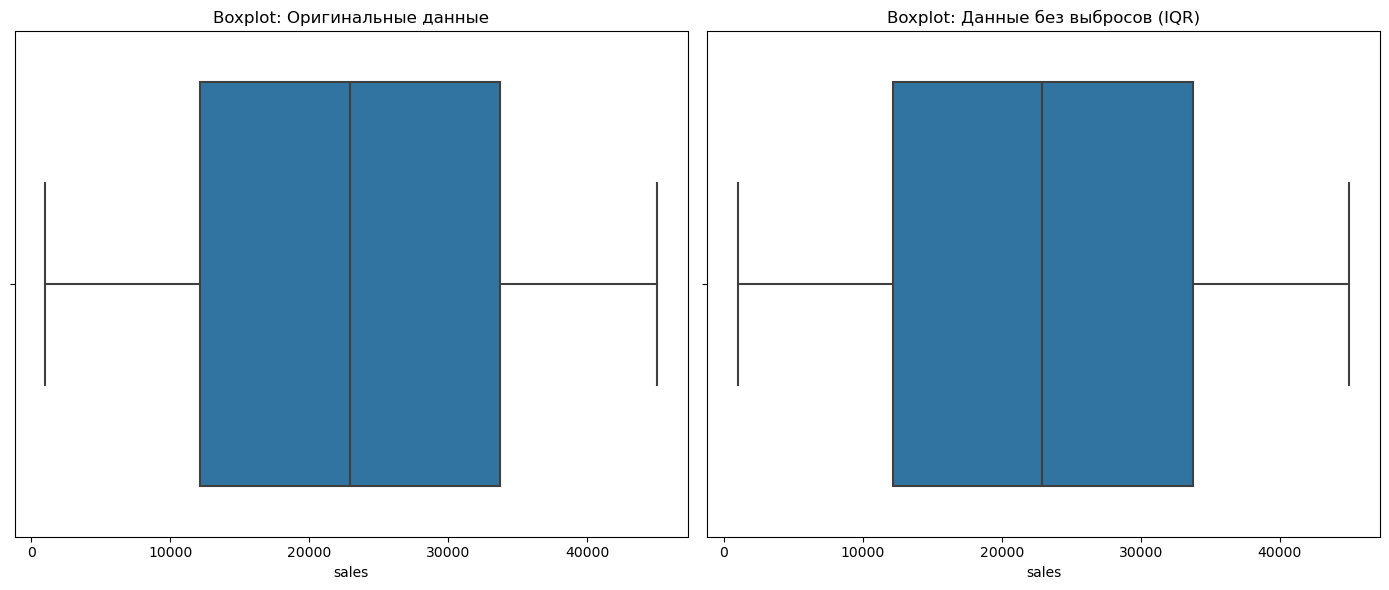

In [36]:
# Построим boxplot для оригинальных данных и очищенных данных
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['sales'])
plt.title('Boxplot: Оригинальные данные')

plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_data['sales'])
plt.title('Boxplot: Данные без выбросов (IQR)')

plt.tight_layout()
plt.show()

In [37]:
# Выводим количество выбросов по методу IQR
original_outliers_count = df.shape[0] - filtered_data.shape[0]
print(f"Количество выбросов по методу IQR: {original_outliers_count}")

Количество выбросов по методу IQR: 0


## Задание 3
Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales

Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). 

Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

In [38]:
df.head()

,id,order_date,class,region,sub_category,sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13


In [50]:
df['region'].unique()

array(['Урал', 'Владивосток', 'Калиниград', 'Москва'], dtype=object)

In [39]:
df['sales'].describe()

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: sales, dtype: float64

На основе данных можно выделить три группы:

- Маленькие продажи: ниже 25-го процентиля (до 12135.63)
- Средние продажи: от 25-го до 75-го процентиля (от 12135.63 до 33730.13)
- Высокие продажи: выше 75-го процентиля (выше 33730.13)

### Присвоение групп продаж создание df['sale_group']

In [41]:
def categorize_sales(sales):
    if sales < 12135.63:
        return 'Маленькие продажи'
    elif sales < 33730.13:
        return 'Средние продажи'
    else:
        return 'Высокие продажи'

df['sale_group'] = df['sales'].apply(categorize_sales)

### Группировка данных

Теперь сгруппиемте данные по регионам и группам продаж:

In [45]:
grouped_data = df.groupby(['region', 'sale_group']).agg({'sales': ['count', 'sum', 'mean']}).reset_index()
grouped_data

region         sale_group sales                            
                                   count           sum          mean
0   Владивосток    Высокие продажи   718  2.823214e+07  39320.533162
1   Владивосток  Маленькие продажи   715  4.642905e+06   6493.573587
2   Владивосток    Средние продажи  1352  3.107764e+07  22986.419349
3    Калиниград    Высокие продажи   756  2.981133e+07  39432.981997
4    Калиниград  Маленькие продажи   763  5.069059e+06   6643.589742
5    Калиниград    Средние продажи  1621  3.704991e+07  22856.203800
6        Москва    Высокие продажи   417  1.633080e+07  39162.600288
7        Москва  Маленькие продажи   392  2.528322e+06   6449.800673
8        Москва    Средние продажи   789  1.803253e+07  22854.911698
9          Урал    Высокие продажи   559  2.194230e+07  39252.768730
10         Урал  Маленькие продажи   580  3.849450e+06   6636.983200
11         Урал    Средние продажи  1138  2.606684e+07  22905.834552

## Для того чтобы найти наиболее прибыльную группу, используем агрегированные данные:

In [46]:
most_profitable_group = grouped_data.loc[grouped_data['sales']['sum'].idxmax()]
most_profitable_group

region                    Калиниград
sale_group           Средние продажи
sales       count               1621
            sum          37049906.36
            mean          22856.2038
Name: 5, dtype: object

Для лучшего понимания результатов построим график:

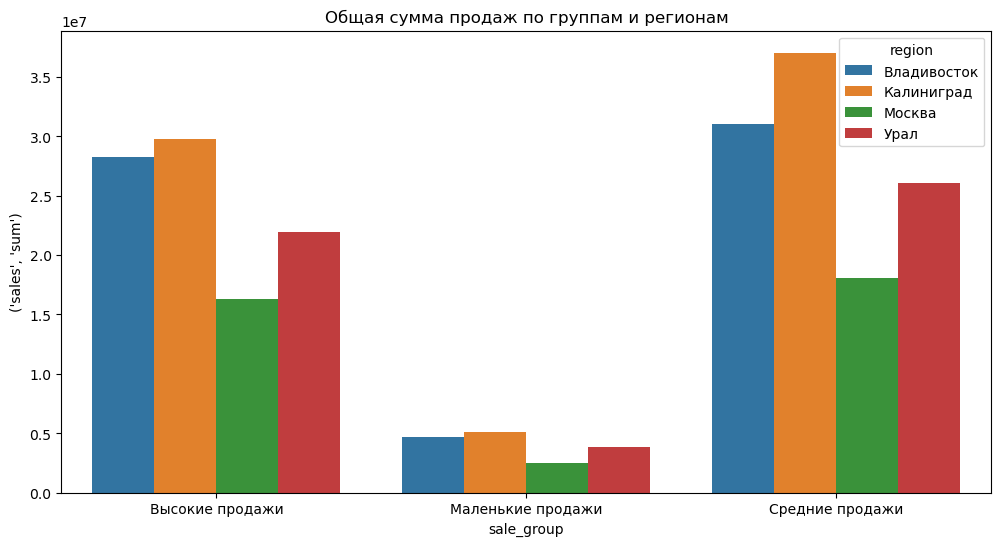

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='sale_group', y=('sales', 'sum'), hue='region')
plt.title('Общая сумма продаж по группам и регионам')
plt.show()

## Вывод:
▎1. Общее количество продаж
- Владивосток и Калининград имеют наибольшее количество продаж в каждой группе, особенно в высоких и средних продажах.
- Москва и Урал также показывают значительные объемы, но количество продаж в высоких группах несколько ниже по сравнению с Владивостоком и Калининградом.

▎2. Сумма продаж
- Калининград имеет наибольшую общую сумму высоких продаж (29.81 млн), что указывает на его сильное положение в этой категории.
- Владивосток и Урал также имеют высокие суммы, но чуть ниже, чем у Калининграда.
- Средние продажи по всем регионам показывают схожие результаты, с небольшими вариациями.

▎3. Средняя величина продаж
- В Калининграде средний размер высоких продаж (39,432) немного превышает аналогичные показатели в других регионах, что может указывать на более высокую покупательскую способность или более дорогие товары.
- Владивосток и Урал показывают схожие значения средних продаж в высоких группах, однако их средние продажи в маленькой группе ниже (6493 и 6636 соответственно).
- В среднем, маленькие продажи по всем регионам значительно ниже, чем средние и высокие продажи.

▎4. Сравнение групп
- Все регионы показывают тенденцию к тому, что количество высоких продаж меньше, чем количество средних и маленьких. Это может указывать на то, что высокий уровень продаж не так распространен среди клиентов.
- Средние продажи составляют основную массу во всех регионах, что может говорить о том, что большинство клиентов выбирают товары средней ценовой категории.

▎5. Региональные различия
- Калининград выделяется как наиболее прибыльный регион с высокой суммой продаж и высокой средней величиной в группе высоких продаж.
- Москва демонстрирует относительно низкие объемы высоких продаж по сравнению с другими регионами, хотя средние и маленькие продажи остаются стабильными.

▎Заключение
В целом, данные показывают, что высокие продажи являются меньшинством среди всех групп, но при этом они приносят значительную сумму. Калининград выделяется как наиболее успешный регион по высоким продажам. Владивосток и Урал имеют схожие показатели, но с некоторыми различиями в количестве и суммах продаж. Эти тенденции могут помочь в разработке стратегий для увеличения объемов высоких продаж в других регионах.